# Analiza eksploracyjna `songs_top_10.csv`
### Wczytanie danych

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

songs = pd.read_csv('../data_sets/songs_top_10.csv')
songs['duration_ms'] = songs['duration_ms'].apply(lambda x: x / 1000 / 60)
songs.rename(columns={'duration_ms': 'duration'}, inplace=True)
songs.columns = ['artysci','tytul','data', 'akustycznosc', 'tanecznosc', 'czas-trwania-m', 'energia', 'instrumentalnosc', 'wykonanie-na-zywo', 'lirycznosc']

## Statystyki opisowe

In [66]:
songs.describe()

,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,lirycznosc
count,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,0.297914,0.616230,3.763728,0.607293,0.035143,0.180851,0.069266
std,0.277637,0.154301,1.237129,0.199012,0.145608,0.152402,0.076969
min,0.000008,0.000000,0.655033,0.003420,0.000000,0.012400,0.000000
25%,0.052750,0.518000,2.991225,0.463000,0.000000,0.085950,0.032000
50%,0.206000,0.630000,3.695550,0.623000,0.000006,0.124000,0.040700
75%,0.506500,0.727000,4.306983,0.765000,0.000523,0.233000,0.065100
max,0.994000,0.988000,39.984283,0.994000,1.000000,0.996000,0.929000


## Histogramy i szeregi rozdzielcze

akustycznosc
(-0.001986, 0.0994]    1723
(0.0994, 0.199]         685
(0.199, 0.298]          529
(0.298, 0.398]          387
(0.398, 0.497]          343
(0.497, 0.596]          292
(0.596, 0.696]          306
(0.696, 0.795]          310
(0.795, 0.895]          243
(0.895, 0.994]          101
Name: count, dtype: int64


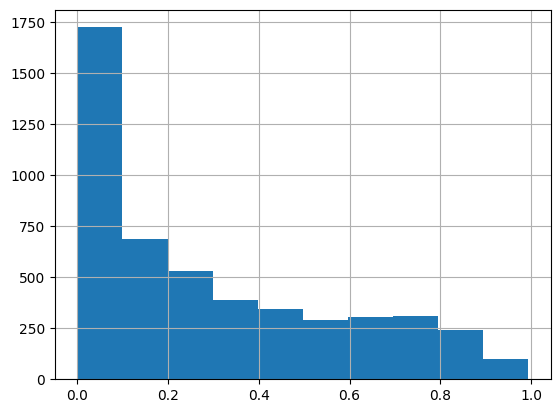

tanecznosc
(-0.001988, 0.0988]       1
(0.0988, 0.198]          16
(0.198, 0.296]          133
(0.296, 0.395]          320
(0.395, 0.494]          559
(0.494, 0.593]          979
(0.593, 0.692]         1219
(0.692, 0.79]          1089
(0.79, 0.889]           492
(0.889, 0.988]          111
Name: count, dtype: int64


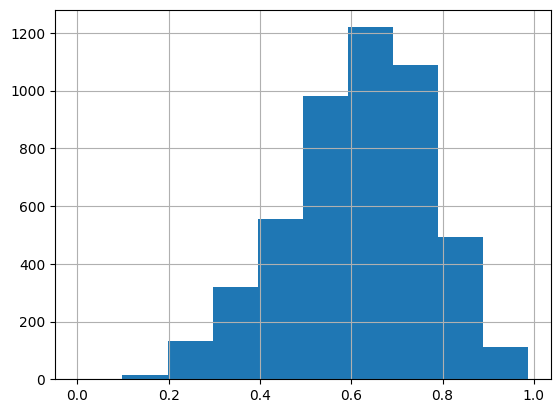

czas-trwania-m
(0.615, 4.588]      4047
(4.588, 8.521]       855
(8.521, 12.454]       11
(12.454, 16.387]       3
(16.387, 20.32]        1
(20.32, 24.253]        0
(24.253, 28.186]       1
(28.186, 32.118]       0
(32.118, 36.051]       0
(36.051, 39.984]       1
Name: count, dtype: int64


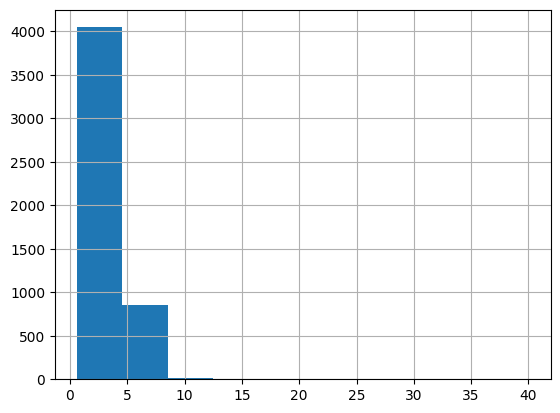

energia
(0.0014299999999999998, 0.102]     32
(0.102, 0.202]                     97
(0.202, 0.301]                    232
(0.301, 0.4]                      443
(0.4, 0.499]                      673
(0.499, 0.598]                    771
(0.598, 0.697]                    864
(0.697, 0.796]                    806
(0.796, 0.895]                    711
(0.895, 0.994]                    290
Name: count, dtype: int64


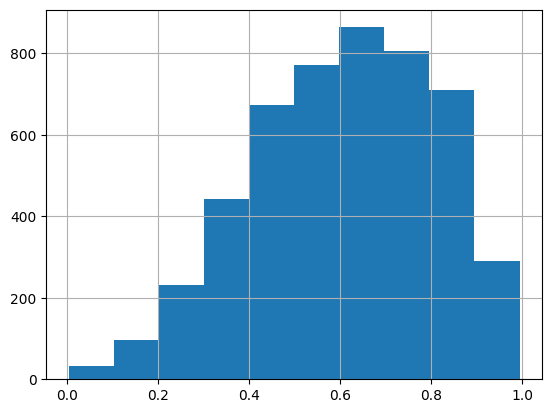

instrumentalnosc
(-0.002, 0.1]    4610
(0.1, 0.2]         78
(0.2, 0.3]         28
(0.3, 0.4]         23
(0.4, 0.5]         26
(0.5, 0.6]         19
(0.6, 0.7]         23
(0.7, 0.8]         28
(0.8, 0.9]         50
(0.9, 1.0]         34
Name: count, dtype: int64


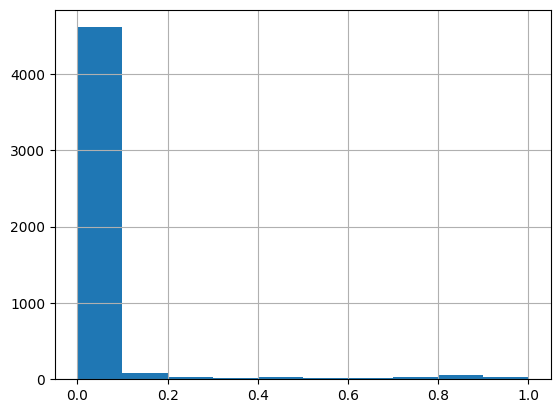

wykonanie-na-zywo
(0.0104, 0.111]    2093
(0.111, 0.209]     1448
(0.209, 0.307]      601
(0.307, 0.406]      427
(0.406, 0.504]      116
(0.504, 0.603]       77
(0.603, 0.701]       79
(0.701, 0.799]       29
(0.799, 0.898]       20
(0.898, 0.996]       29
Name: count, dtype: int64


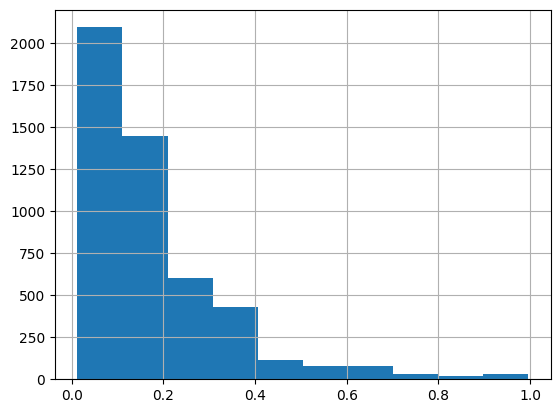

lirycznosc
(-0.0019290000000000002, 0.0929]    4124
(0.0929, 0.186]                      431
(0.186, 0.279]                       176
(0.279, 0.372]                       124
(0.372, 0.464]                        46
(0.464, 0.557]                        11
(0.557, 0.65]                          4
(0.65, 0.743]                          0
(0.743, 0.836]                         1
(0.836, 0.929]                         2
Name: count, dtype: int64


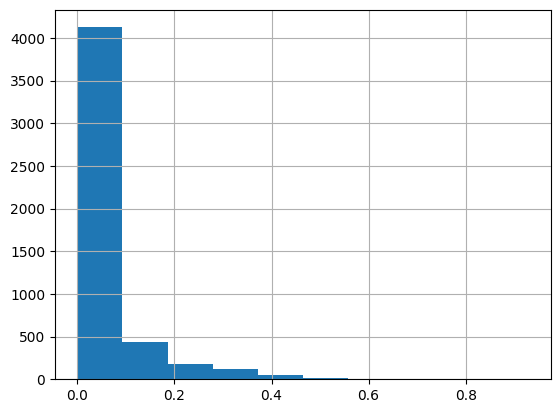

In [67]:
header_names = songs.columns[3:]
for i in header_names:
    frequency = songs[i].value_counts(bins=10).sort_index()
    print(frequency)
    frequency.columns = ['liczba']
    songs[i].hist(bins=10)
    plt.show()

### Liczba utworów instrumentalnych

,liczba
instrumentalnosc,
"(-0.001, 0.5]",4765
"(0.5, 1.0]",154


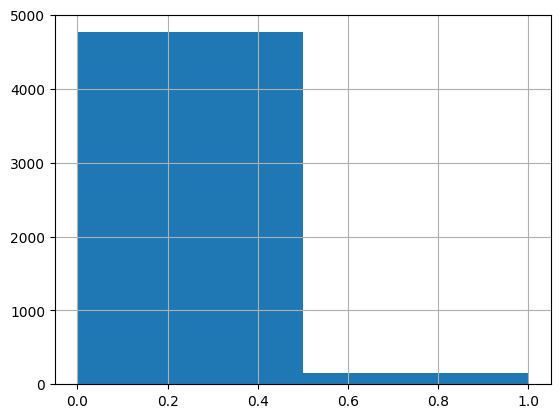

In [68]:
frequency = songs['instrumentalnosc'].value_counts(bins=[0, 0.5, 1]).to_frame()
frequency.columns = ['liczba']
display(frequency)
songs['instrumentalnosc'].hist(bins=[0, 0.5, 1])
plt.show()

### Liczba utworów na żywo

,liczba
wykonanie-na-zywo,
"(-0.001, 0.8]",4870
"(0.8, 1.0]",49


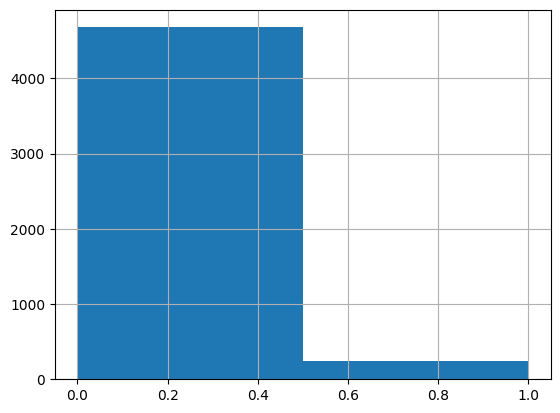

In [69]:
frequency = songs['wykonanie-na-zywo'].value_counts(bins=[0, 0.8, 1]).to_frame()
frequency.columns = ['liczba']
display(frequency)
songs['wykonanie-na-zywo'].hist(bins=[0, 0.5, 1])
plt.show()

### Liczba utworów wokalnych

,liczba
lirycznosc,
"(-0.001, 0.33]",4806
"(0.33, 0.66]",110
"(0.66, 1.0]",3


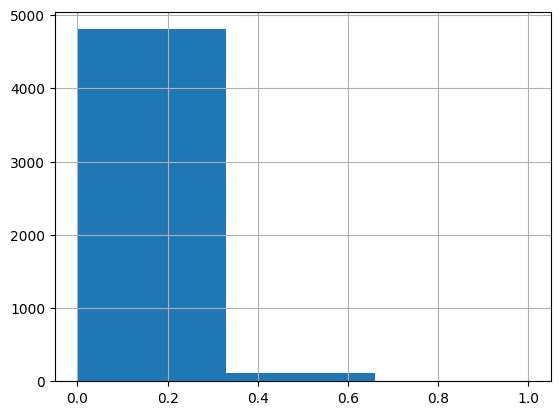

In [70]:
frequency = songs['lirycznosc'].value_counts(bins=[0, 0.33, 0.66, 1]).to_frame()
frequency.columns = ['liczba']
display(frequency)
songs['lirycznosc'].hist(bins=[0, 0.33, 0.66, 1])
plt.show()

## Zmiany w czasie

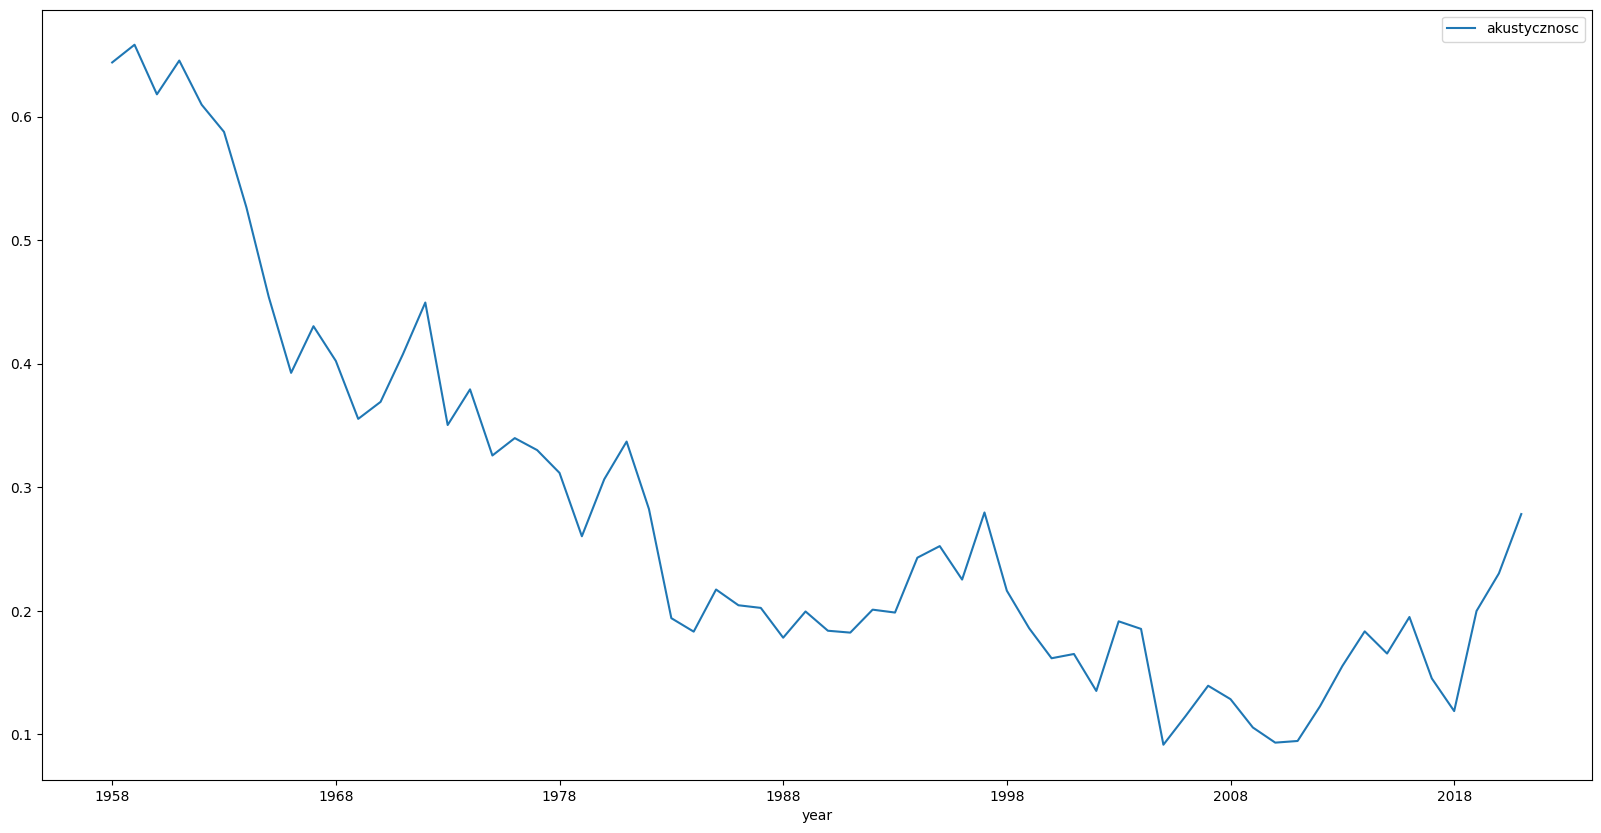

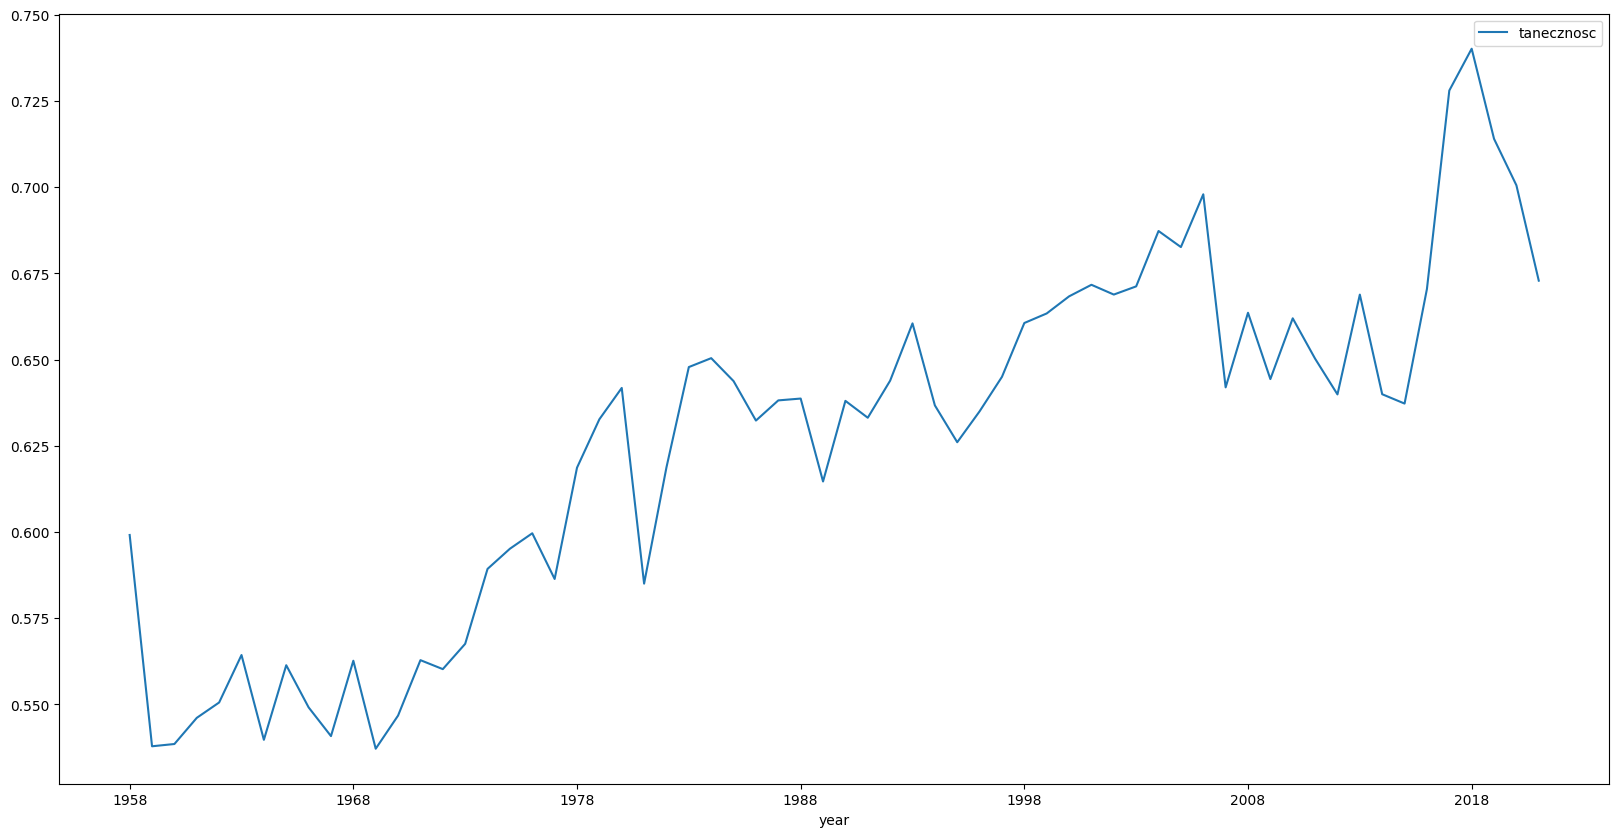

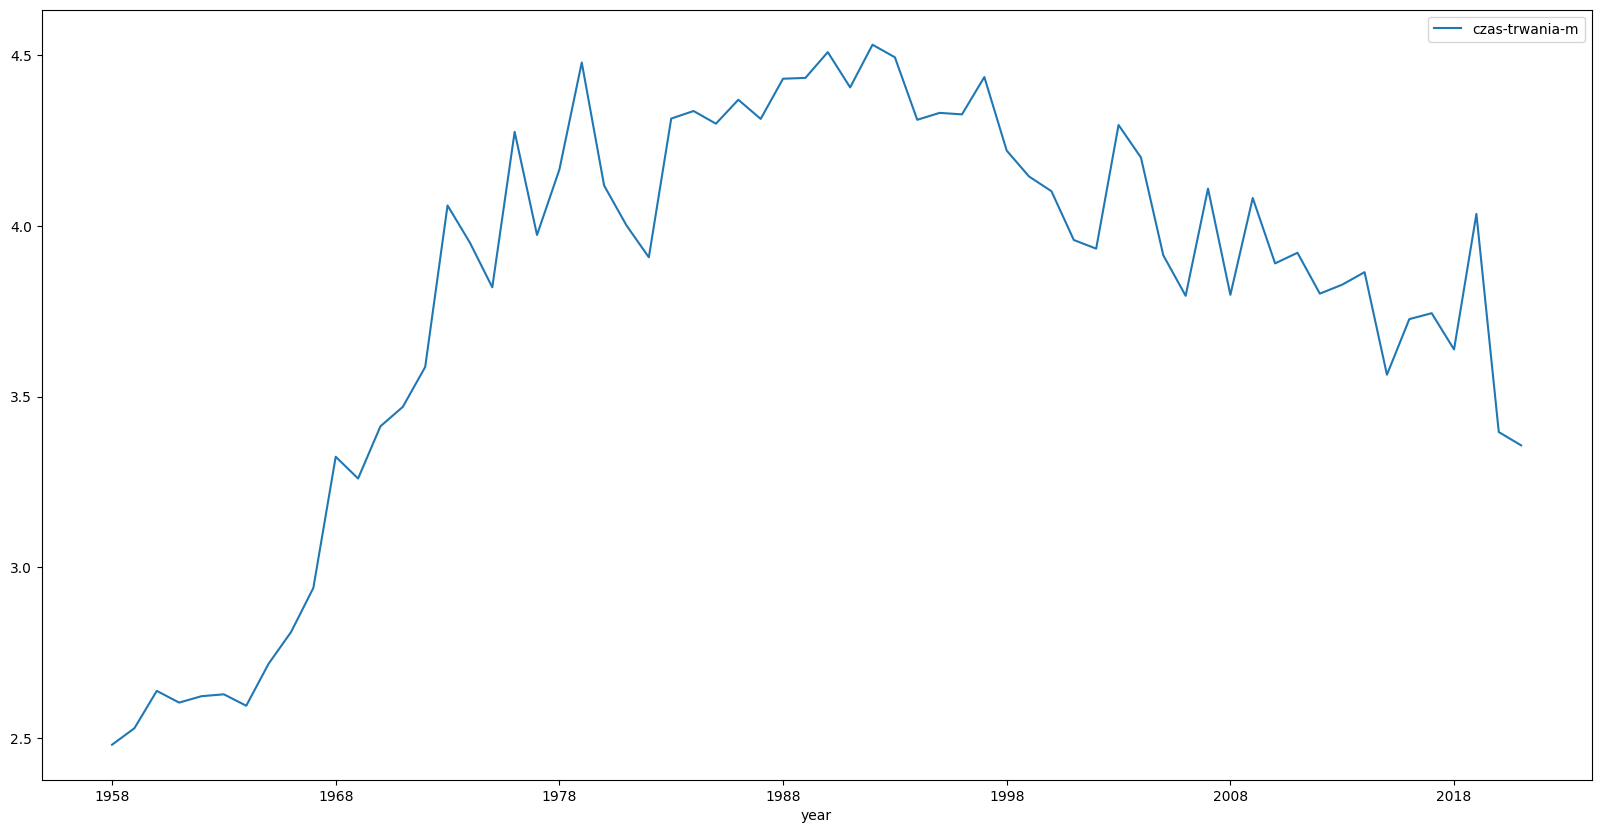

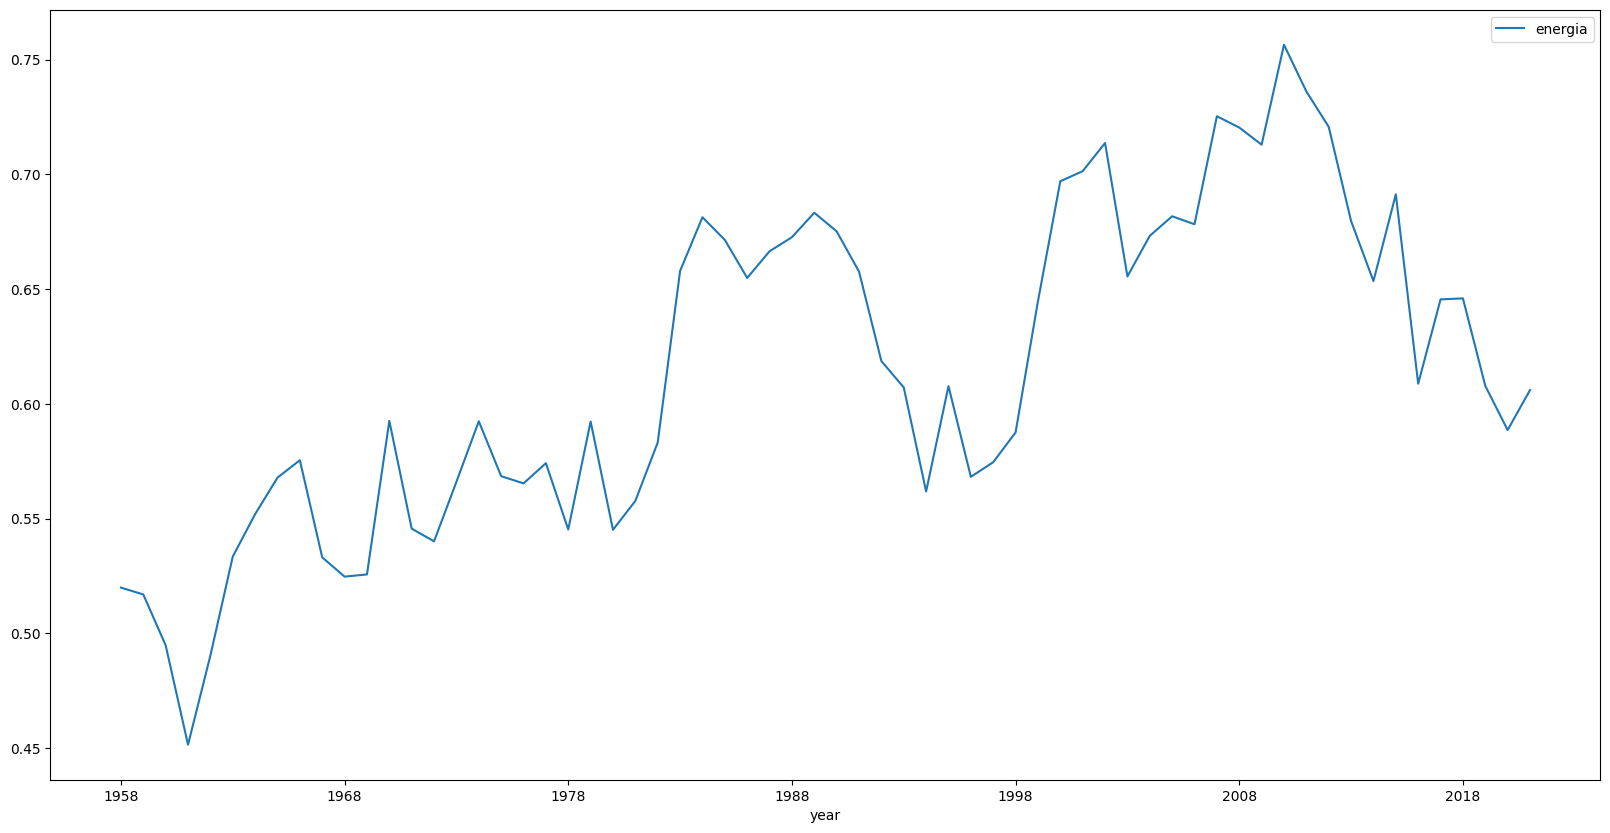

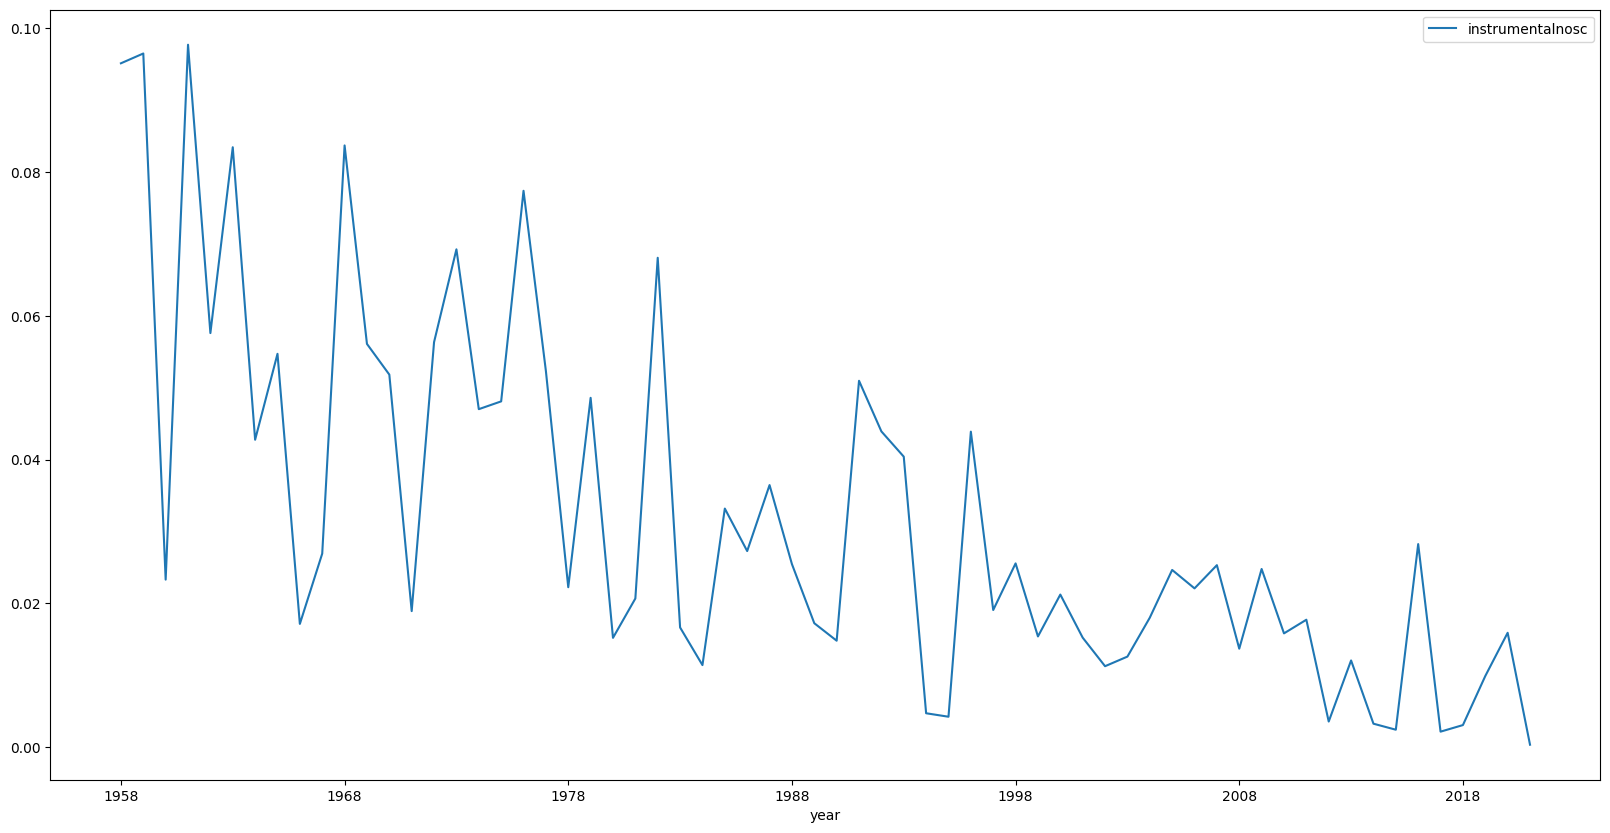

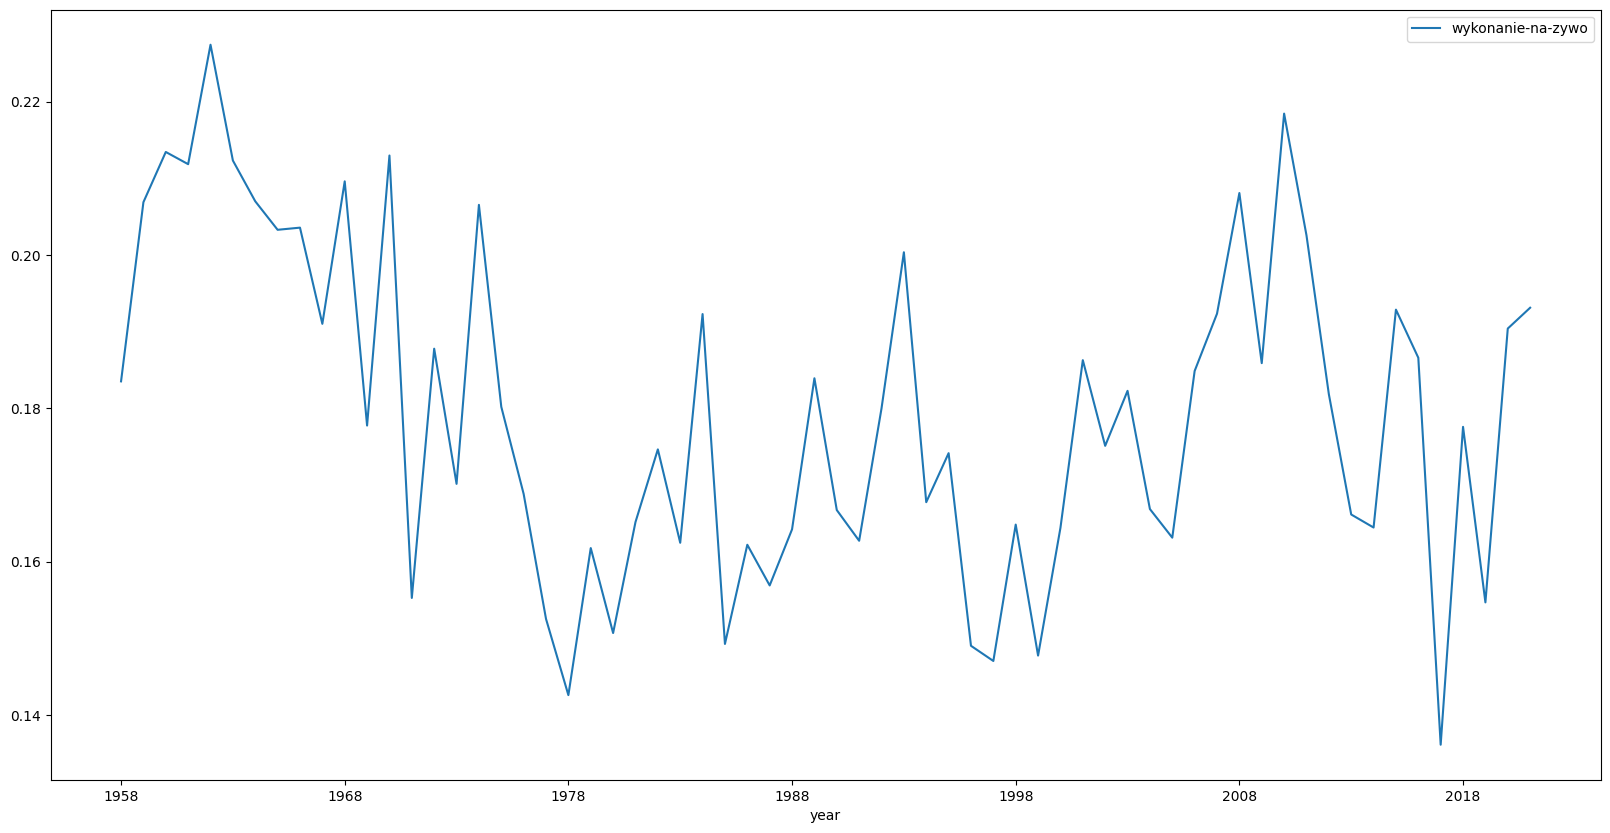

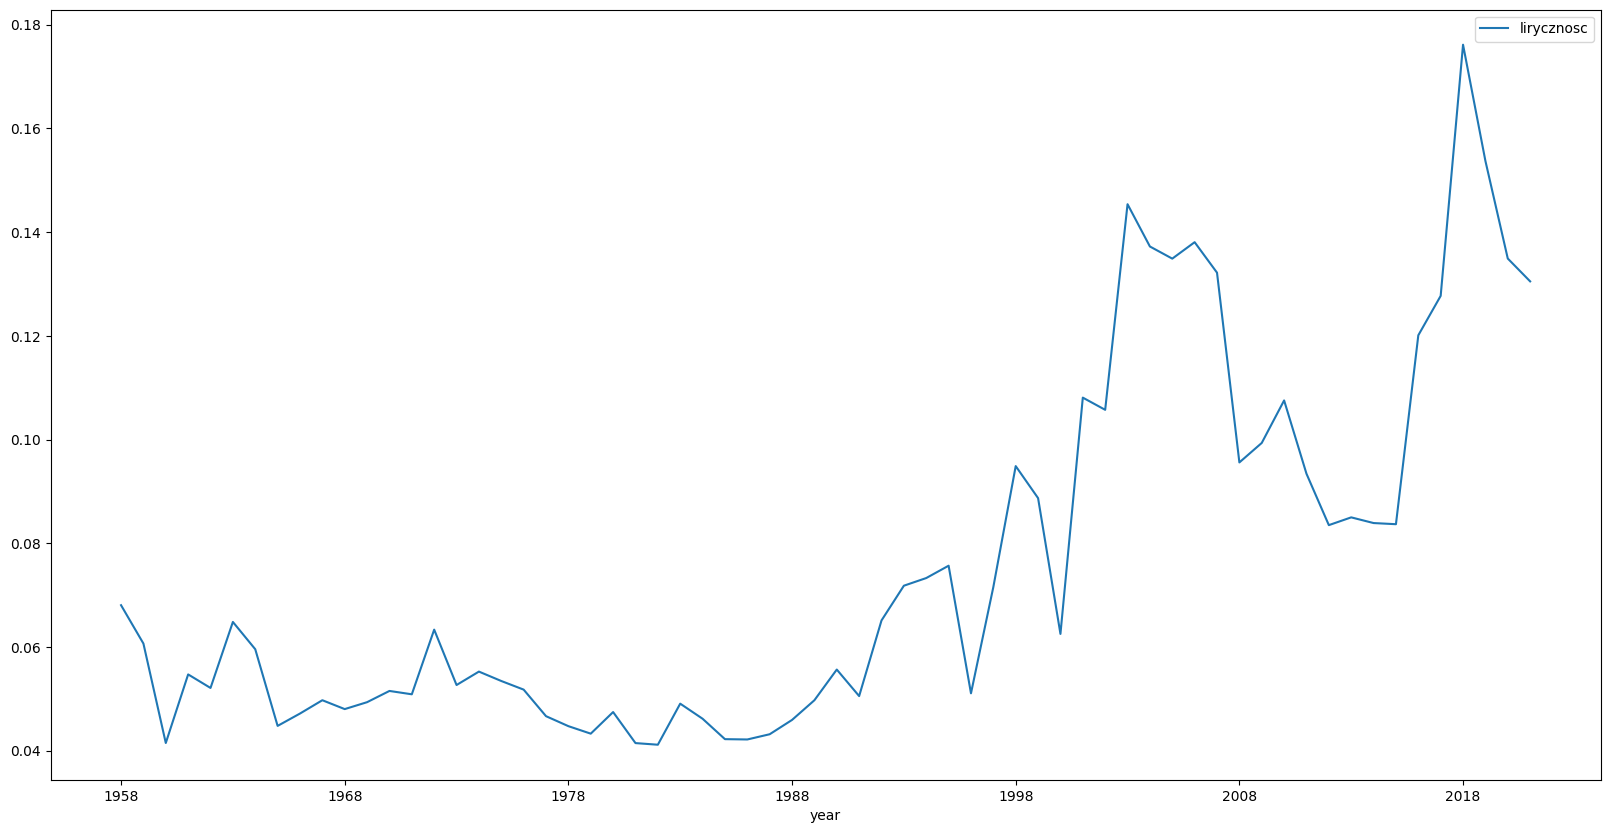

In [71]:
for i in header_names:
    songs['year'] = songs['data'].str[:4]
    header_names.drop([i])
    year_means = songs.groupby('year').mean(i).drop(header_names.drop([i]), axis=1)
    year_means.plot.line(figsize=(20, 10))
    plt.show()

## Korelacje

In [87]:
display(songs.corr(method="pearson", numeric_only=True))
display(songs.corr(method="spearman", numeric_only=True))

,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,lirycznosc
akustycznosc,1.000000,-0.346747,-0.242227,-0.569202,0.041216,0.038596,-0.148198
tanecznosc,-0.346747,1.000000,0.053738,0.231485,-0.045281,-0.133997,0.201106
czas-trwania-m,-0.242227,0.053738,1.000000,0.085679,-0.020960,-0.030882,0.026001
energia,-0.569202,0.231485,0.085679,1.000000,-0.049198,0.113110,0.166033
instrumentalnosc,0.041216,-0.045281,-0.020960,-0.049198,1.000000,0.006724,-0.057682
wykonanie-na-zywo,0.038596,-0.133997,-0.030882,0.113110,0.006724,1.000000,0.093211
lirycznosc,-0.148198,0.201106,0.026001,0.166033,-0.057682,0.093211,1.000000


,akustycznosc,tanecznosc,czas-trwania-m,energia,instrumentalnosc,wykonanie-na-zywo,lirycznosc
akustycznosc,1.000000,-0.293229,-0.311664,-0.524238,-0.056981,0.065993,-0.244956
tanecznosc,-0.293229,1.000000,0.113436,0.192513,0.040837,-0.172533,0.321378
czas-trwania-m,-0.311664,0.113436,1.000000,0.112899,0.110898,-0.105089,0.004163
energia,-0.524238,0.192513,0.112899,1.000000,0.020446,0.070204,0.339717
instrumentalnosc,-0.056981,0.040837,0.110898,0.020446,1.000000,-0.082153,-0.110165
wykonanie-na-zywo,0.065993,-0.172533,-0.105089,0.070204,-0.082153,1.000000,0.061345
lirycznosc,-0.244956,0.321378,0.004163,0.339717,-0.110165,0.061345,1.000000
